In [1]:
pip install tensorboard pandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

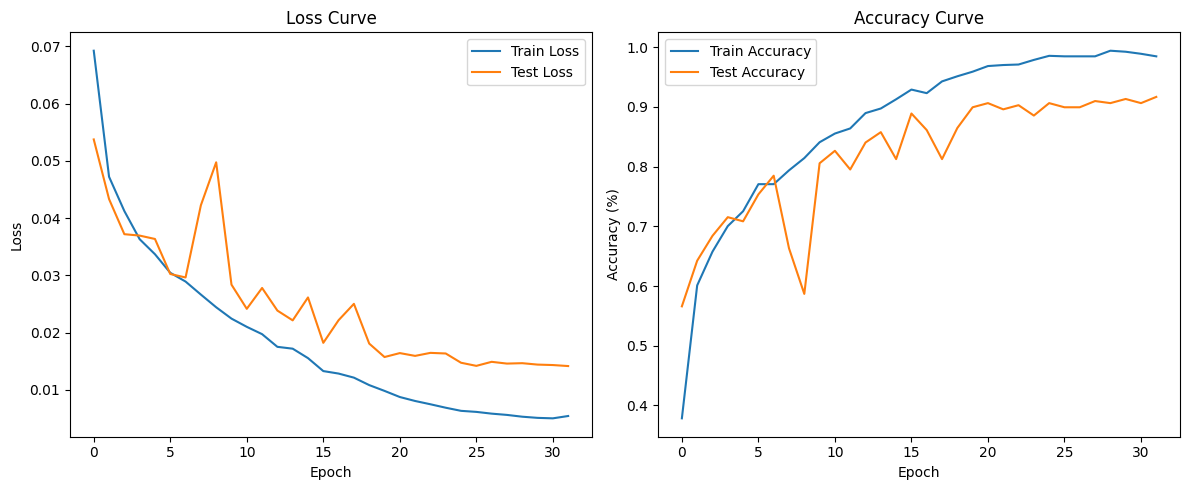

In [8]:
# 替换为你自己的 log_dir 路径
log_dir = "./logs/T16_b16_adam_lr0.001_c128_amp_cupy_denoise_frameNum2"


ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()

# 提取 scalars
train_loss = ea.Scalars('train_loss')
train_acc = ea.Scalars('train_acc')
test_loss = ea.Scalars('test_loss')
test_acc = ea.Scalars('test_acc')
train_speed = ea.Scalars('train_speed')
test_speed = ea.Scalars('test_speed')

# 转换为 numpy 数组
epochs = [x.step for x in train_loss]
train_loss = [x.value for x in train_loss]
train_acc = [x.value for x in train_acc]
test_loss = [x.value for x in test_loss]
test_acc = [x.value for x in test_acc]
train_speed = [x.value for x in train_speed]
test_speed = [x.value for x in test_speed]

# 绘图
# ...existing code...

# 绘图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()



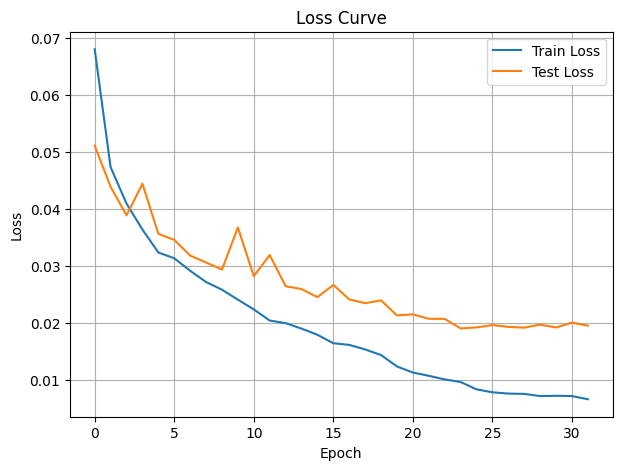

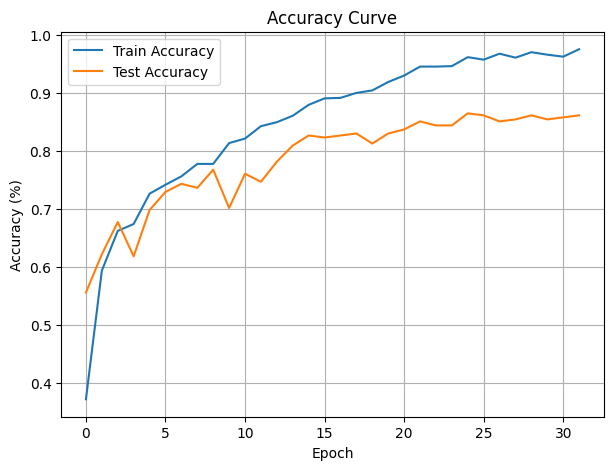

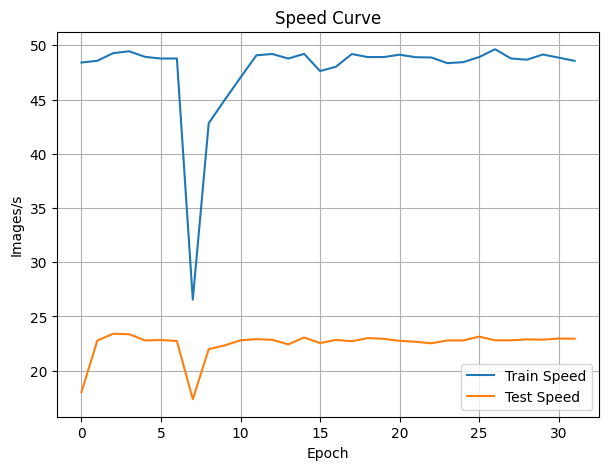

In [4]:
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.grid(True)
plt.show()

# 准确率曲线
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curve')
plt.grid(True)
plt.show()

# 速度曲线
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_speed, label='Train Speed')
plt.plot(epochs, test_speed, label='Test Speed')
plt.xlabel('Epoch')
plt.ylabel('Images/s')
plt.legend()
plt.title('Speed Curve')
plt.grid(True)
plt.show()

In [2]:
import os
# Define the path to the 'logs' directory
logs_path = '../datasets/DVS128Gesture/'
# Use os.listdir() to get a list of all items in the 'logs' directory
all_items = os.listdir(logs_path)
# Filter the list to include only directories
folders = [item for item in all_items if os.path.isdir(os.path.join(logs_path, item))]
folders = folders[5:]
# Print the list of folders
for name in folders:
    print(name)

frames_number_16_split_by_number
frames_number_2_split_by_number
frames_number_4_split_by_number
frames_number_8_split_by_number
integrate_events_to_2_frames_denoised2


The directory [../datasets/DVS128Gesture\frames_number_2_split_by_number] already exists.
{0: 0, 1: 97, 2: 195, 3: 293, 4: 391, 5: 489, 6: 587, 7: 685, 8: 784, 9: 980, 10: 1078}
The directory [../datasets/DVS128Gesture\frames_number_2_split_by_number] already exists.
The directory [../datasets/DVS128Gesture\frames_number_4_split_by_number] already exists.
The directory [../datasets/DVS128Gesture\frames_number_8_split_by_number] already exists.
The directory [../datasets/DVS128Gesture\frames_number_16_split_by_number] already exists.


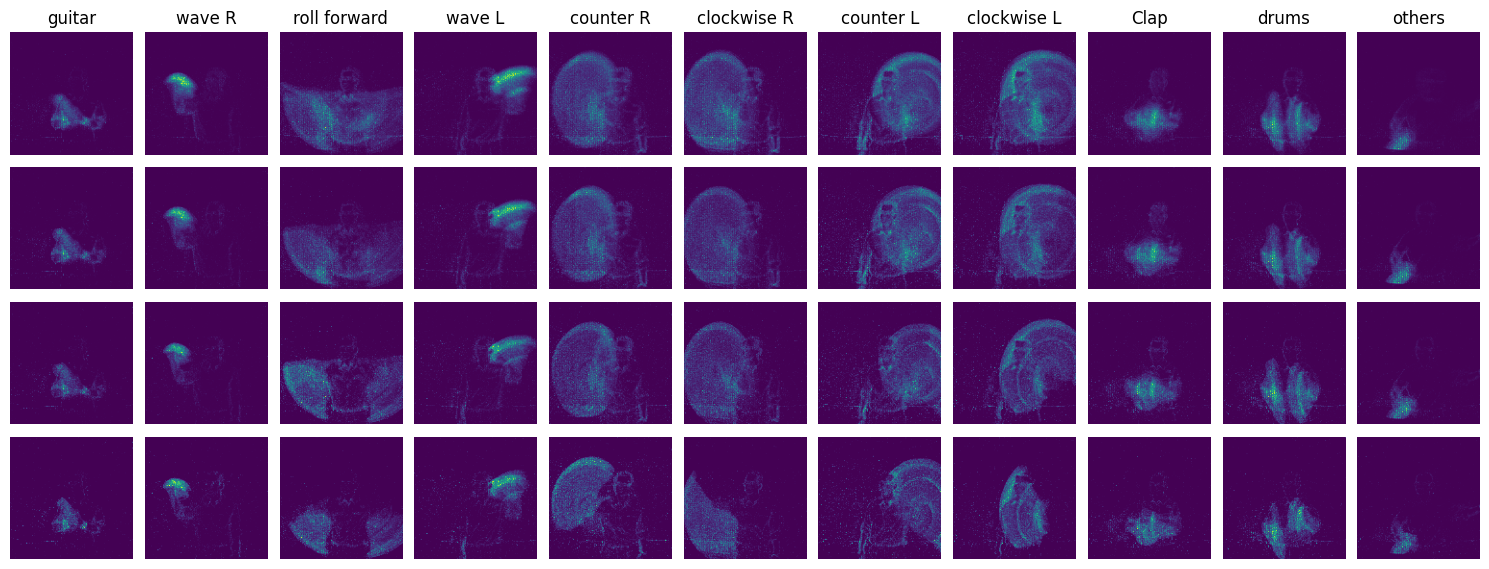

In [7]:
import matplotlib.pyplot as plt
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
gesture_labels = {
    0:"guitar",
    1:"wave R",
    2:"roll forward",
    3:"wave L",
    4:"counter R",
    5:"clockwise R",
    6:"counter L",
    7:"clockwise L",
    8:"Clap",
    9:"drums",
    10:"others"
}
root='../datasets/DVS128Gesture'
train_set = DVS128Gesture(root, train=True, data_type='frame', frames_number=2, split_by='number')
class_indices = {}
for idx in range(len(train_set)):
    _, label = train_set[idx]
    if label not in class_indices:
        class_indices[label] = idx  # 记录该类别的第一个样本索引
    if len(class_indices) == 11:  # DVS128Gesture 共11个类别
        break
print(class_indices)
# 设置绘图参数
num_datasets = 4  # frames_number = 2^1 到 2^4
num_classes = len(class_indices)  # 总共有 11 个类别
fig, axes = plt.subplots(num_datasets, num_classes, figsize=(15, 5.5))

def plotDataset(i, axes):
    frames_number = 2 ** i
    train_set = DVS128Gesture(root, train=True, data_type='frame', frames_number=frames_number, split_by='number')

    for label, idx in class_indices.items():
        frame, _ = train_set[idx]

        ax = axes[i-1, label]
        ax.imshow(frame[0, 0])
        ax.set_ylabel(f'{frames_number} frames')
        if  i == 1:  # 第一行
            ax.set_title(gesture_labels[label])
        ax.axis('off')

for i in range(1, 5):  # frames_number = 2^i
    plotDataset(i, axes)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.1, hspace=0)
plt.show()

The directory [../datasets/DVS128Gesture\integrate_events_to_16_frames_by_time] already exists.


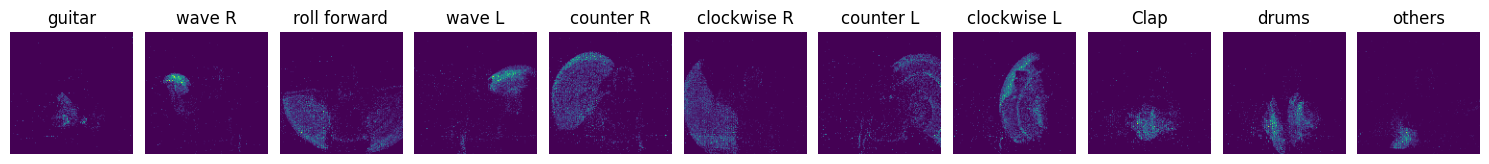

In [9]:
# #空间-时间-极性一致性滤波
# from typing import Dict
# import numpy as np
# import spikingjelly.datasets as sjds
# from scipy.spatial import cKDTree

# def polarity_consistent_filter_events(events: Dict, min_neighbors=1, time_window=1000):
#     """
#     空间-时间-极性一致性滤波
#     """
#     t, x, y, p = (events[key] for key in ('t', 'x', 'y', 'p'))
#     features = np.stack([t // time_window, x, y], axis=1)
#     tree = cKDTree(features)
#     # 查询每个点的邻居索引
#     neighbors = tree.query_ball_point(features, r=1)
#     keep = []
#     for i, idxs in enumerate(neighbors):
#         # 统计极性一致的邻居数（包括自己）
#         same_polarity = np.sum(p[idxs] == p[i])
#         if same_polarity > min_neighbors:
#             keep.append(i)
#     keep = np.array(keep)
#     return {
#         't': t[keep],
#         'x': x[keep],
#         'y': y[keep],
#         'p': p[keep]
#     }

# def integrate_events_to_2_frames_denoised2(events: Dict, H: int, W: int):
#     # 用极性一致性滤波
#     events = polarity_consistent_filter_events(events, min_neighbors=1, time_window=1000)
#     if len(events['t']) == 0:
#         return np.zeros([2, 2, H, W])
#     index_split = np.random.randint(low=0, high=len(events['t']))
#     frames = np.zeros([2, 2, H, W])
#     t, x, y, p = (events[key] for key in ('t', 'x', 'y', 'p'))
#     frames[0] = sjds.integrate_events_segment_to_frame(x, y, p, H, W, 0, index_split)
#     frames[1] = sjds.integrate_events_segment_to_frame(x, y, p, H, W, index_split, len(t))
#     return frames
#空间-时间-极性一致性滤波
from typing import Dict
import numpy as np
import spikingjelly.datasets as sjds
from scipy.spatial import cKDTree

def polarity_consistent_filter_events(events: Dict, min_neighbors=1, time_window=1000):
    """
    空间-时间-极性一致性滤波
    """
    t, x, y, p = (events[key] for key in ('t', 'x', 'y', 'p'))
    features = np.stack([t // time_window, x, y], axis=1)
    tree = cKDTree(features)
    # 查询每个点的邻居索引
    neighbors = tree.query_ball_point(features, r=1)
    keep = []
    for i, idxs in enumerate(neighbors):
        # 统计极性一致的邻居数（包括自己）
        same_polarity = np.sum(p[idxs] == p[i])
        if same_polarity > min_neighbors:
            keep.append(i)
    keep = np.array(keep)
    return {
        't': t[keep],
        'x': x[keep],
        'y': y[keep],
        'p': p[keep]
    }

def integrate_events_to_2_frames_denoised2(events: Dict, H: int, W: int):
    # 用极性一致性滤波
    events = polarity_consistent_filter_events(events, min_neighbors=1, time_window=1000)
    if len(events['t']) == 0:
        return np.zeros([2, 2, H, W])
    index_split = np.random.randint(low=0, high=len(events['t']))
    frames = np.zeros([2, 2, H, W])
    t, x, y, p = (events[key] for key in ('t', 'x', 'y', 'p'))
    frames[0] = sjds.integrate_events_segment_to_frame(x, y, p, H, W, 0, index_split)
    frames[1] = sjds.integrate_events_segment_to_frame(x, y, p, H, W, index_split, len(t))
    return frames

def integrate_events_to_16_frames_by_time(events: Dict, H: int, W: int):
    if len(events['t']) == 0:
        return np.zeros([16, 2, H, W])

    events = polarity_consistent_filter_events(events, min_neighbors=1, time_window=1000)

    t = events['t']
    x = events['x']
    y = events['y']
    p = events['p']

    t_start = t[0]
    t_end = t[-1]
    total_duration = t_end - t_start
    base_delta = total_duration // 16
    remainder = total_duration % 16

    frames = np.zeros([16, 2, H, W], dtype=np.float32)

    for i in range(16):
        t_low = t_start + i * base_delta + min(i, remainder)
        t_high = t_low + base_delta + (1 if i < remainder else 0)
        mask = np.logical_and(t >= t_low, t < t_high)
        frame = sjds.integrate_events_segment_to_frame(x[mask], y[mask], p[mask], H, W)
        frames[i] = frame

    return frames
# 创建绘图区域（假设总共有 len(class_indices) 类）
fig, axes = plt.subplots(nrows=1, ncols=len(class_indices), figsize=(15, 5))
# train_set = DVS128Gesture(root, train=True, data_type='frame', split_by='number',custom_integrate_function=integrate_events_to_2_frames_denoised2)
train_set = DVS128Gesture(root, 
                          train=True, 
                          data_type='frame', 
                          split_by='number', 
                          custom_integrate_function=integrate_events_to_16_frames_by_time)
for label, idx in class_indices.items():
    frame, _ = train_set[idx]

    ax = axes[label]
    ax.imshow(frame[0, 0])
    # ax.set_ylabel(f'{frames_number} frames')
    ax.set_title(gesture_labels[label])
    ax.axis('off')
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.1, hspace=0)
plt.show()

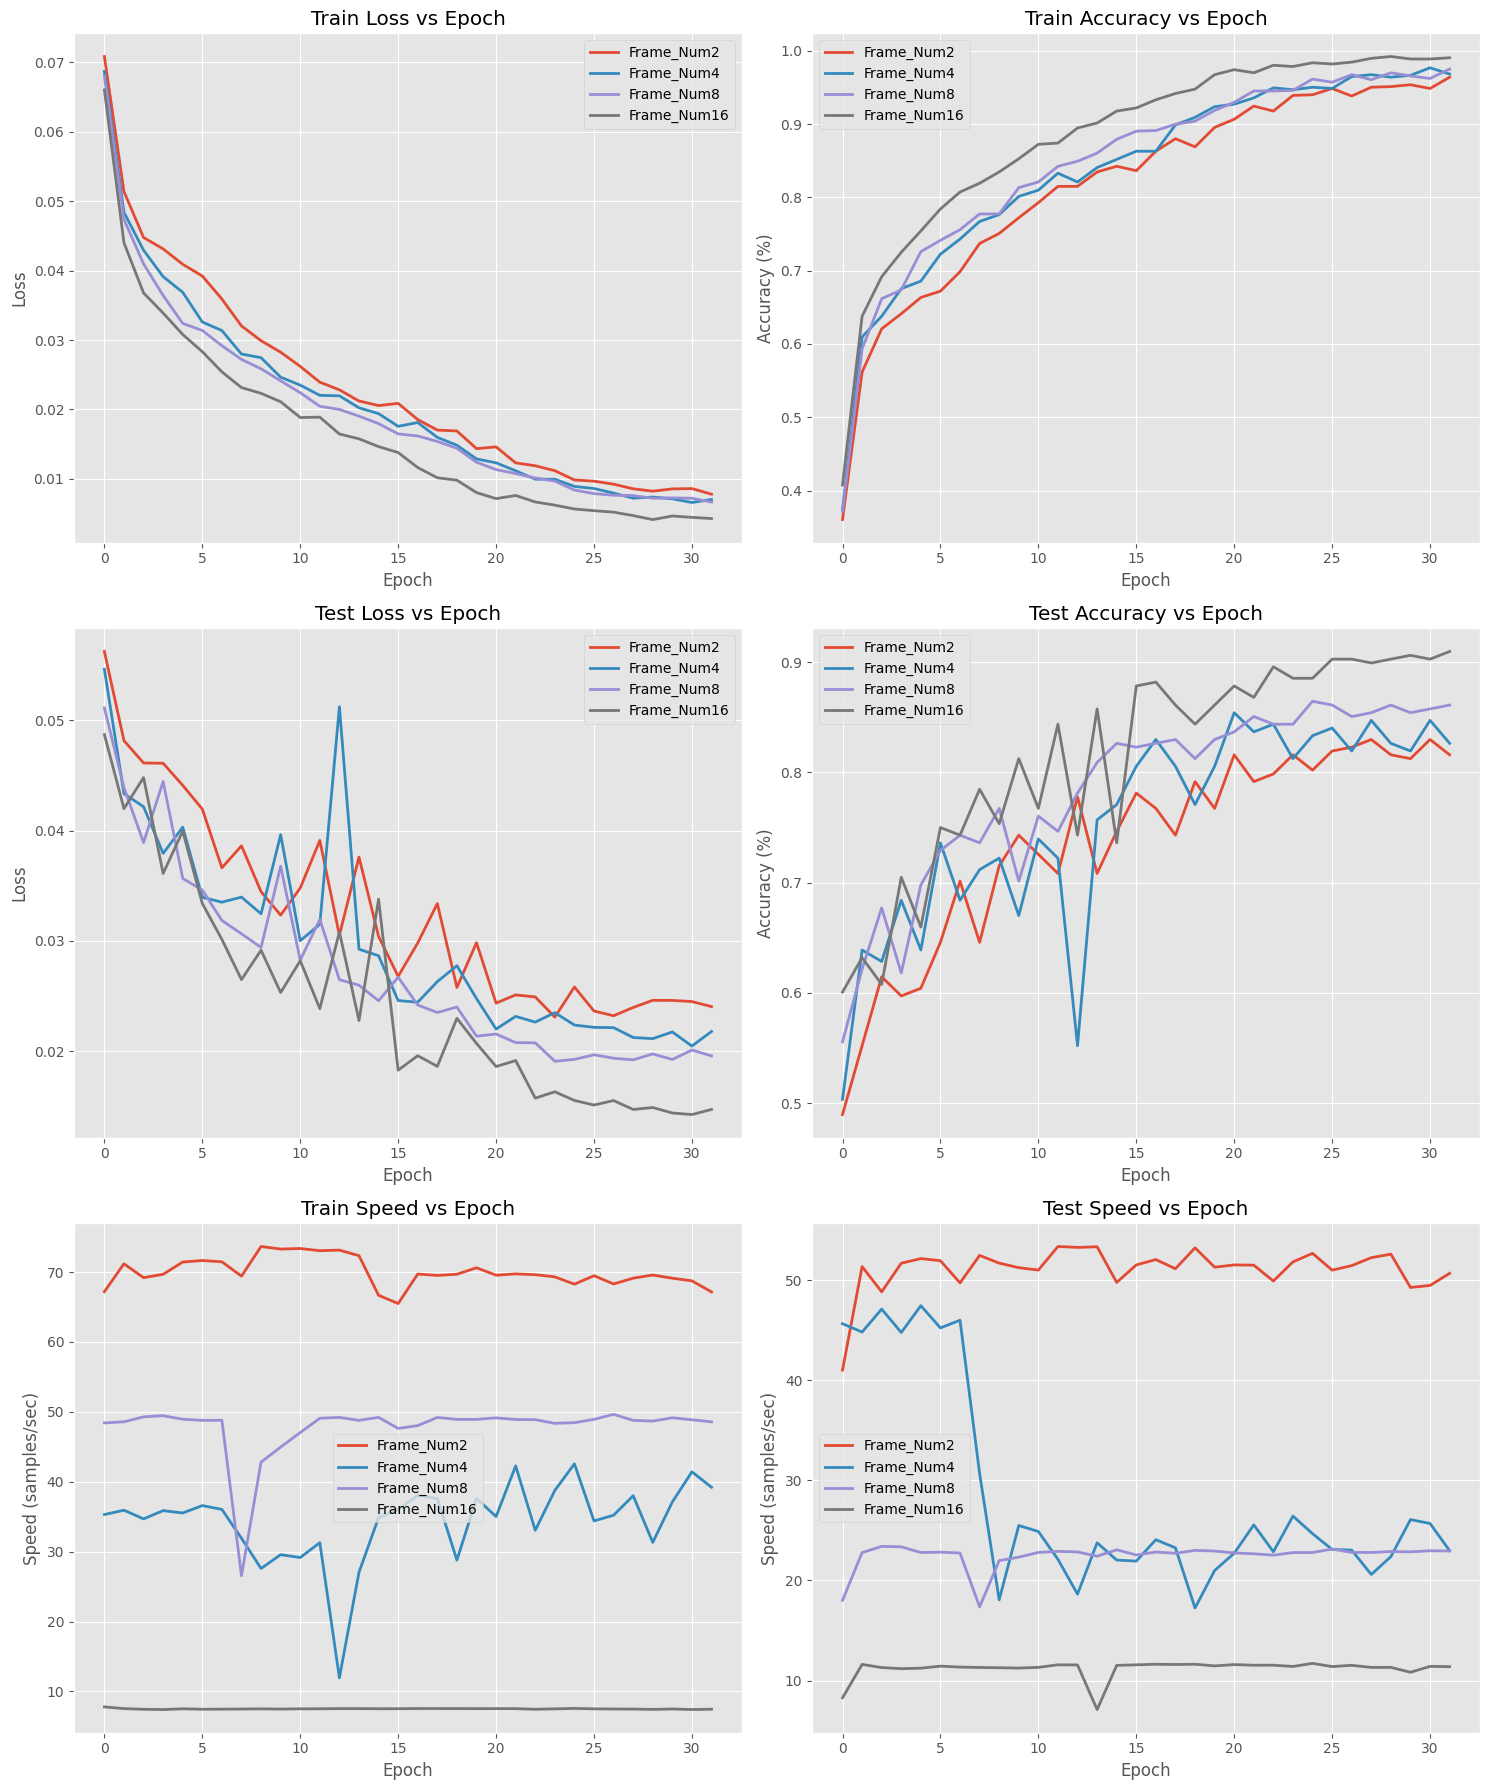

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置CSV文件路径和标签
csv_files = {
    'Frame_Num2': r'd:\MIND\MIND\materials\lab\logs\T2_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num4': r'd:\MIND\MIND\materials\lab\logs\T4_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num8': r'd:\MIND\MIND\materials\lab\logs\T8_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num16': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_Base.csv',
}

# 读取CSV文件
dfs = {}
for label, path in csv_files.items():
    df = pd.read_csv(path)
    dfs[label] = df

# 可视化配置
metrics = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']
y_labels = ['Loss', 'Accuracy (%)', 'Loss', 'Accuracy (%)', 'Speed (samples/sec)', 'Speed (samples/sec)']
titles = ['Train Loss vs Epoch', 'Train Accuracy vs Epoch', 'Test Loss vs Epoch', 
          'Test Accuracy vs Epoch', 'Train Speed vs Epoch', 'Test Speed vs Epoch']

# 创建图表
plt.style.use('ggplot')
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, (metric, y_label, title) in enumerate(zip(metrics, y_labels, titles)):
    ax = axes[i]
    for label, df in dfs.items():
        epochs = df['Epoch']
        values = df[metric]
        ax.plot(epochs, values, label=f'{label}', linewidth=2)
    
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

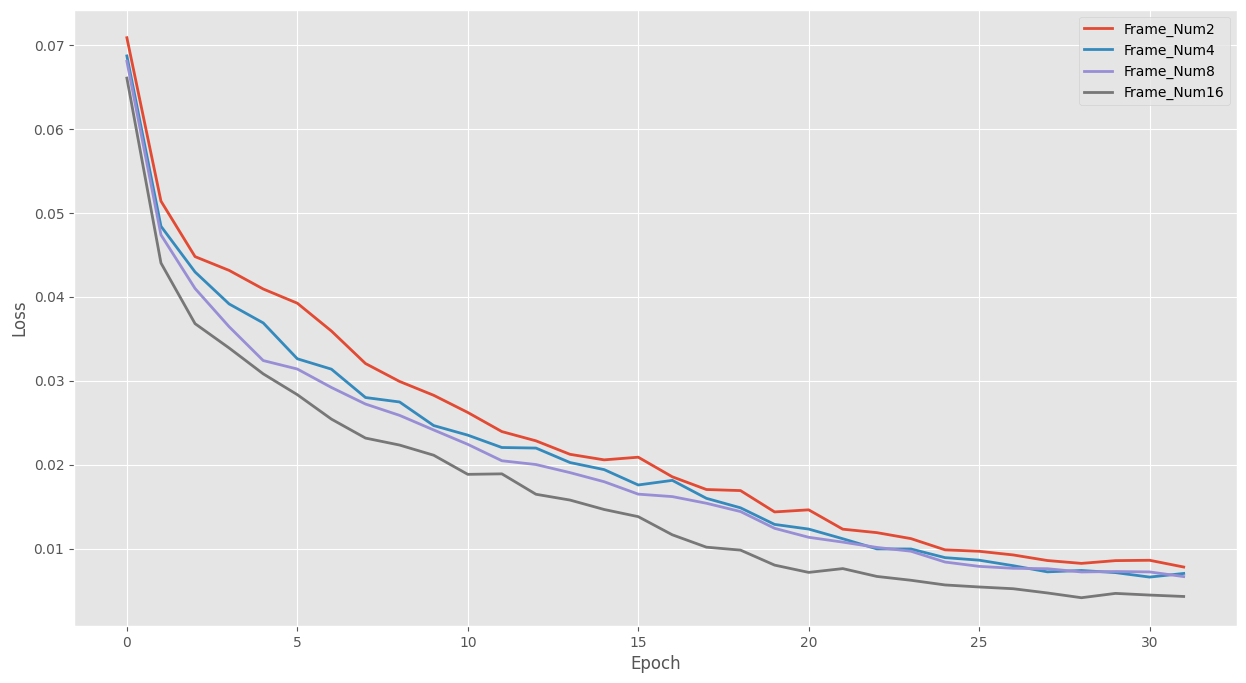

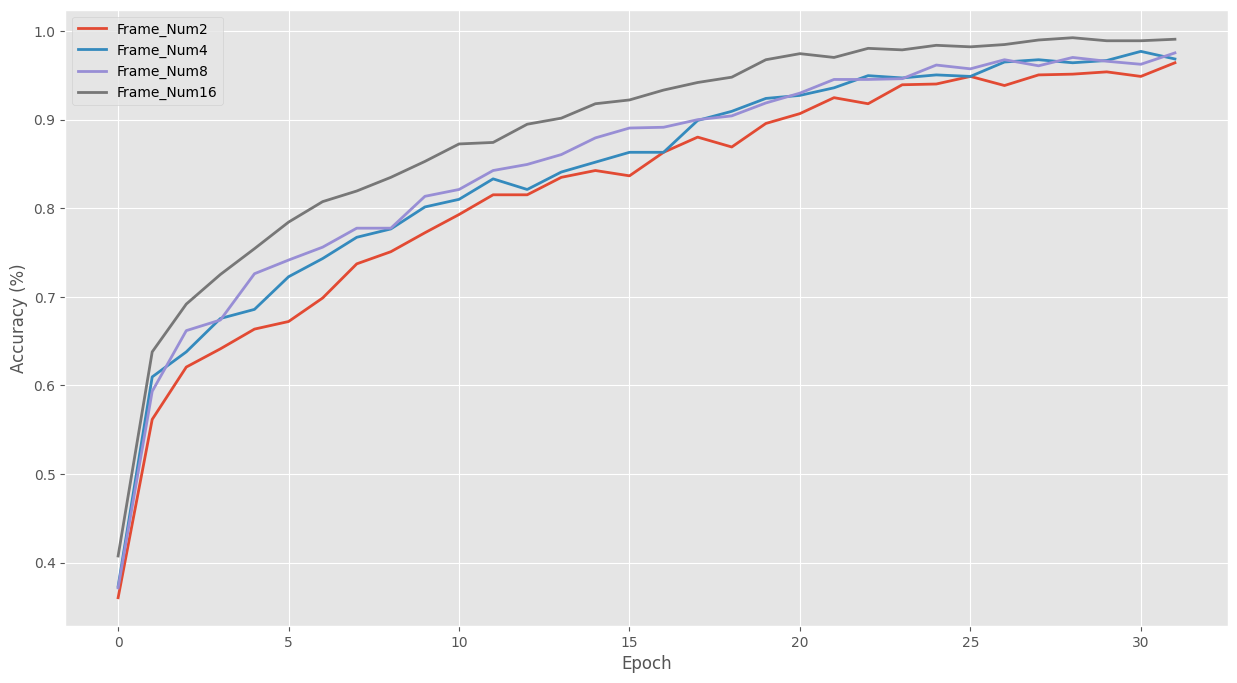

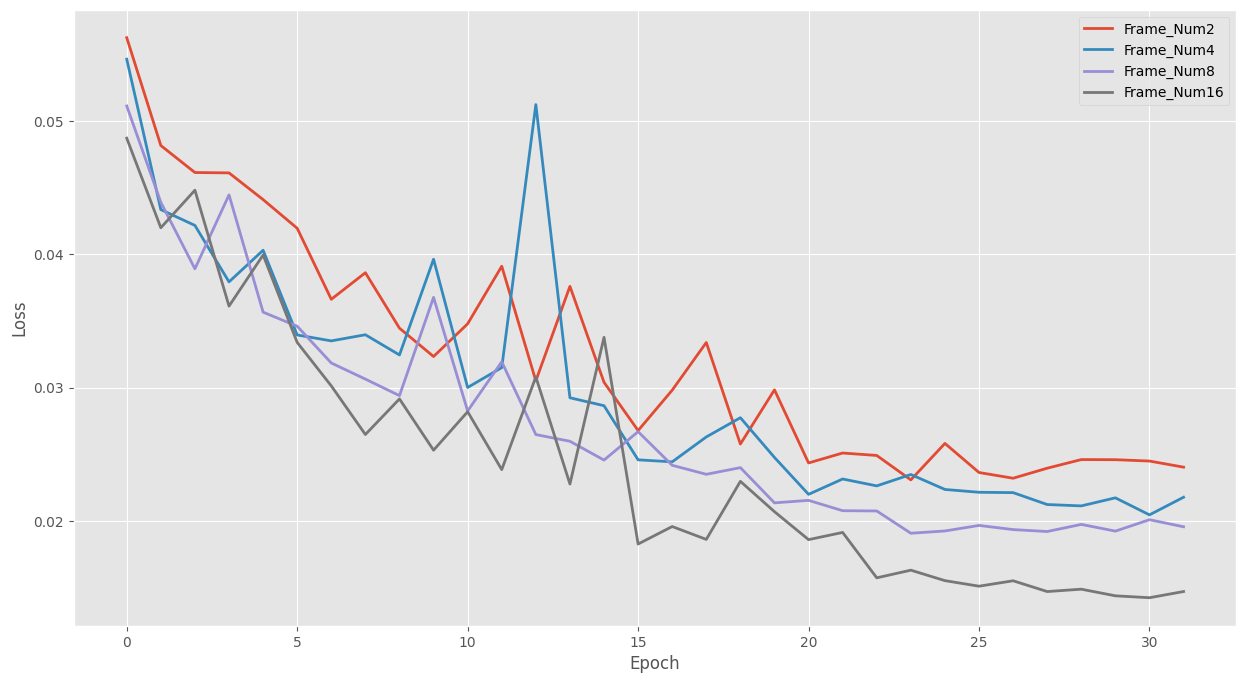

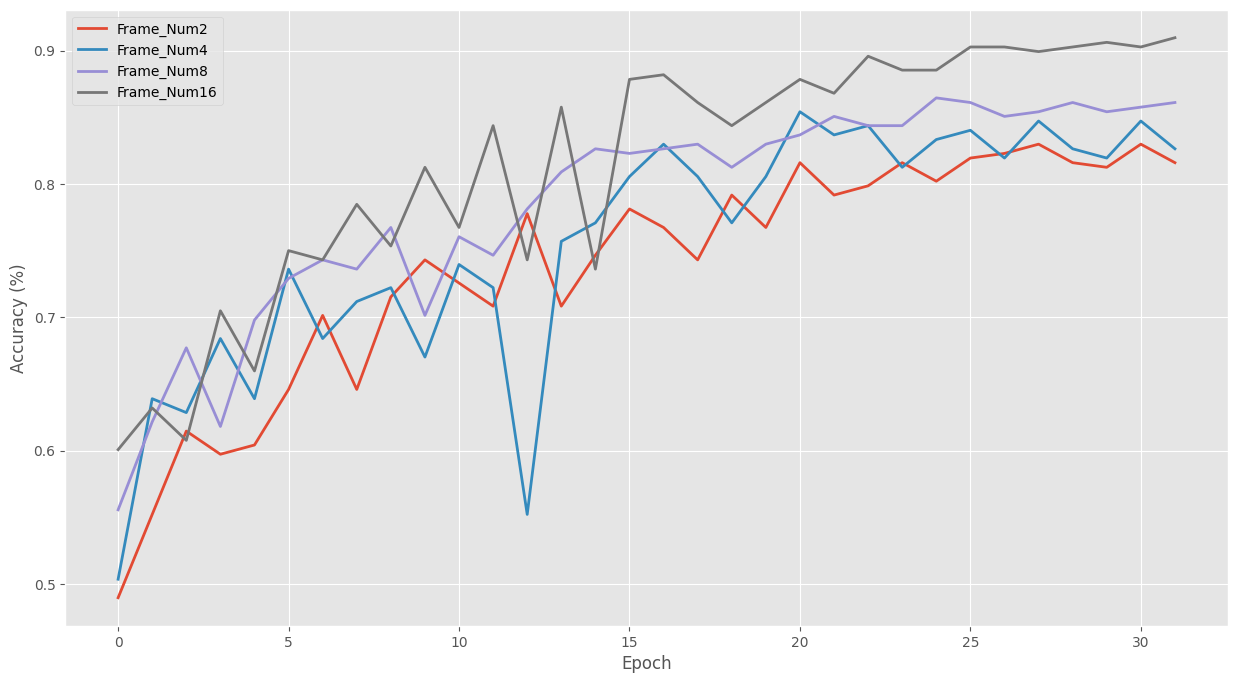

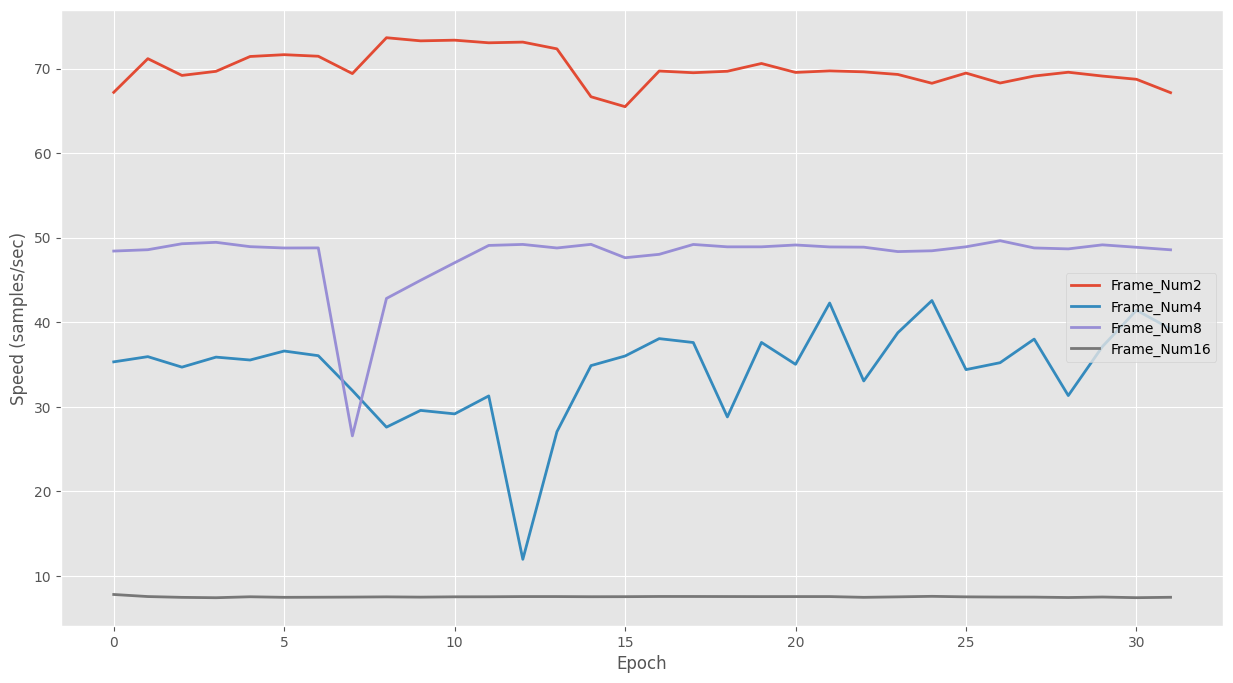

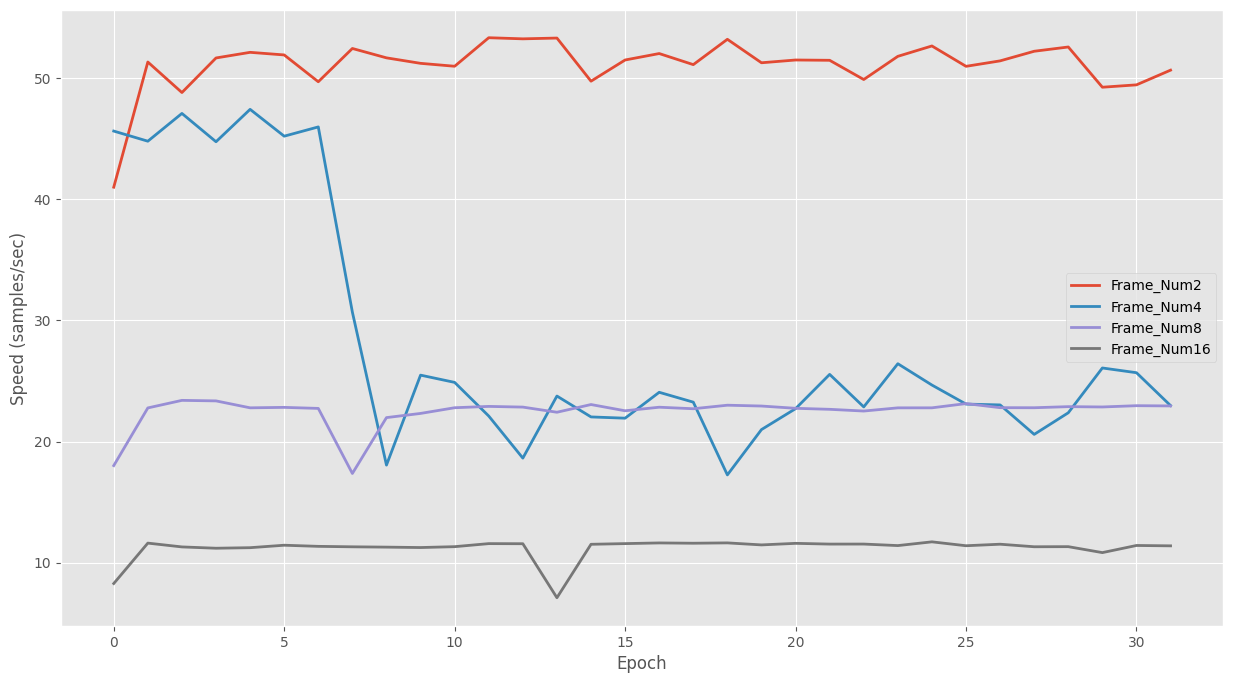

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置CSV文件路径和标签
# 定义CSV文件路径和标签
csv_files = {
    'Frame_Num2': r'd:\MIND\MIND\materials\lab\logs\T2_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num4': r'd:\MIND\MIND\materials\lab\logs\T4_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num8': r'd:\MIND\MIND\materials\lab\logs\T8_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num16': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_Base.csv',
    # 'denoise': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_denoise.csv',
    # 'denoise + SEBlock' : r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_SE.csv',
}


# 读取CSV文件
dfs = {}
for label, path in csv_files.items():
    df = pd.read_csv(path)
    dfs[label] = df

# 可视化配置
metrics = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']
y_labels = ['Loss', 'Accuracy (%)', 'Loss', 'Accuracy (%)', 'Speed (samples/sec)', 'Speed (samples/sec)']
titles = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']

# 创建图表
# plt.style.use('ggplot')
# fig, axes = plt.subplots(3, 2, figsize=(15, 18))
# axes = axes.flatten()

for i, (metric, y_label, title) in enumerate(zip(metrics, y_labels, titles)):
    # ax = axes[i]
    plt.figure(figsize=(15, 8))
    for label, df in dfs.items():
        epochs = df['Epoch']
        values = df[metric]
        plt.plot(epochs, values, label=f'{label}', linewidth=2)
    
    # plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# plt.tight_layout()


Frame_Num2:
  Train Speed Mean: 69.99024748802185
  Test Accuracy Max: 0.8298611044883728
Frame_Num4:
  Train Speed Mean: 34.367019057273865
  Test Accuracy Max: 0.8541666865348816
Frame_Num8:
  Train Speed Mean: 47.77832281589508
  Test Accuracy Max: 0.8645833134651184
Frame_Num16:
  Train Speed Mean: 7.513031035661697
  Test Accuracy Max: 0.9097222089767456
denoise:
  Train Speed Mean: 7.358774110674858
  Test Accuracy Max: 0.9236111044883728
denoise + SEBlock:
  Train Speed Mean: 5.66633939743042
  Test Accuracy Max: 0.9166666865348816


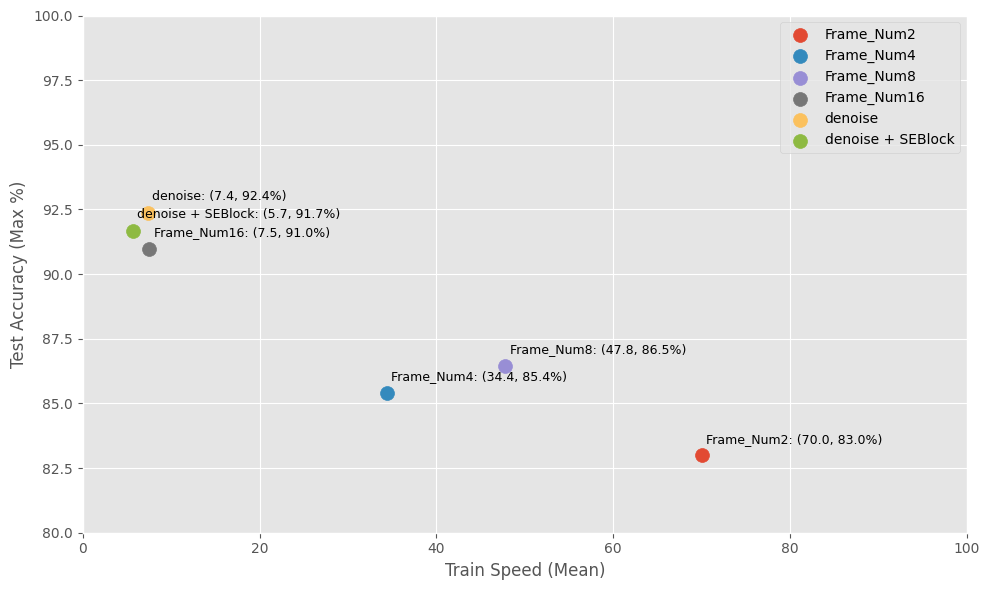

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

# 定义CSV文件路径和标签
csv_files = {
    'Frame_Num2': r'd:\MIND\MIND\materials\lab\logs\T2_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num4': r'd:\MIND\MIND\materials\lab\logs\T4_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num8': r'd:\MIND\MIND\materials\lab\logs\T8_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num16': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_Base.csv',
    'denoise': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_denoise.csv',
    'denoise + SEBlock' : r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_SE.csv',
}

# 创建一个空字典来存储结果
data_dict = {}

# 遍历字典，读取每个CSV文件，并提取需要的列
for key, path in csv_files.items():
    df = pd.read_csv(path)
    data_dict[key] = df[['Train Speed', 'Test Accuracy']].values

# # 打印结果
# for key, data in data_dict.items():
#     print(f"{key}:")
#     print(data.shape)
# 创建一个空字典用于存储结果
result_dict = {}

# 遍历 data_dict，计算 Train Speed 的均值和 Test Accuracy 的最大值
for key, data in data_dict.items():
    train_speed_mean = data[:, 0].mean()  # 第一列为 Train Speed
    test_accuracy_max = data[:, 1].max()  # 第二列为 Test Accuracy
    
    result_dict[key] = {
        'Train Speed Mean': train_speed_mean,
        'Test Accuracy Max': test_accuracy_max
    }

# 打印结果
for key, values in result_dict.items():
    print(f"{key}:")
    print(f"  Train Speed Mean: {values['Train Speed Mean']}")
    print(f"  Test Accuracy Max: {values['Test Accuracy Max']}")

# 创建绘图
plt.figure(figsize=(10, 6))

# 绘制所有实验点
for key, values in result_dict.items():
    x = values['Train Speed Mean']
    y = values['Test Accuracy Max'] * 100
    plt.scatter(x, y, label=key,s=100)
    # 标注每个点的 Key 和具体坐标
    plt.text(x + 0.5, y + 0.5, f'{key}: ({x:.1f}, {y:.1f}%)', fontsize=9)

# 设置图表标题和坐标轴标签
# plt.title('Train Speed vs Test Accuracy')
plt.xlabel('Train Speed (Mean)')
plt.ylabel('Test Accuracy (Max %)')

# 设置坐标轴范围
plt.xlim(0, 100)
plt.ylim(80, 100)

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 展示图形
plt.tight_layout()


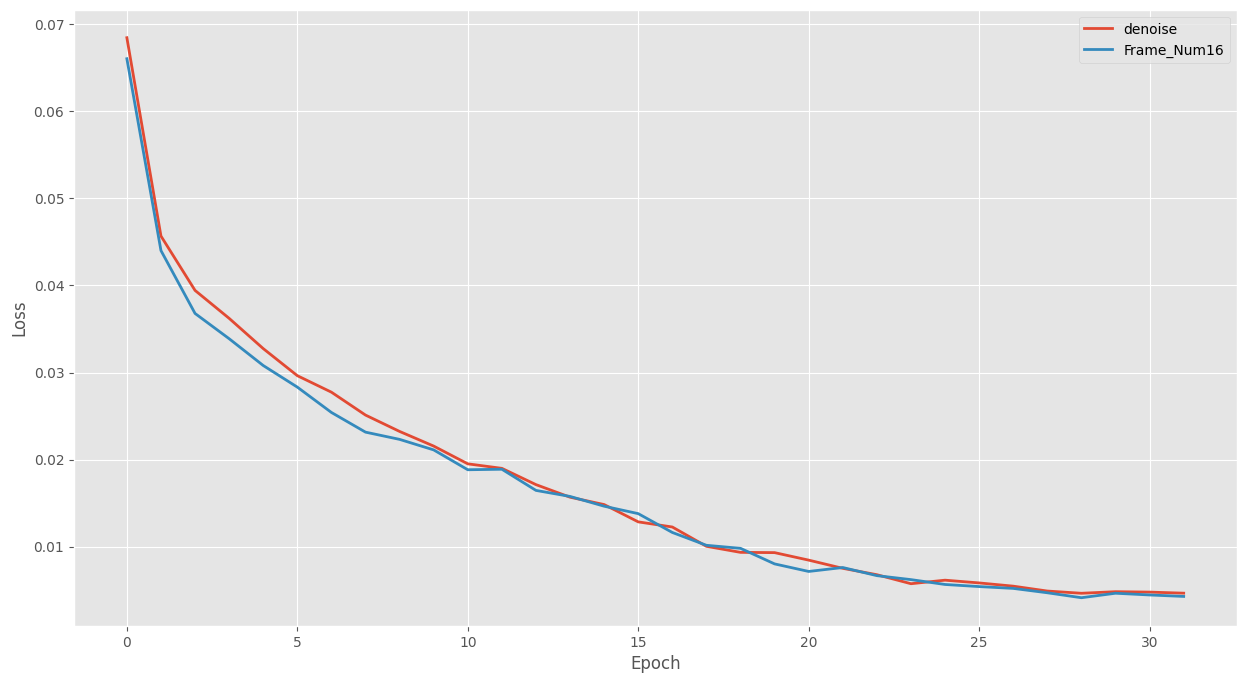

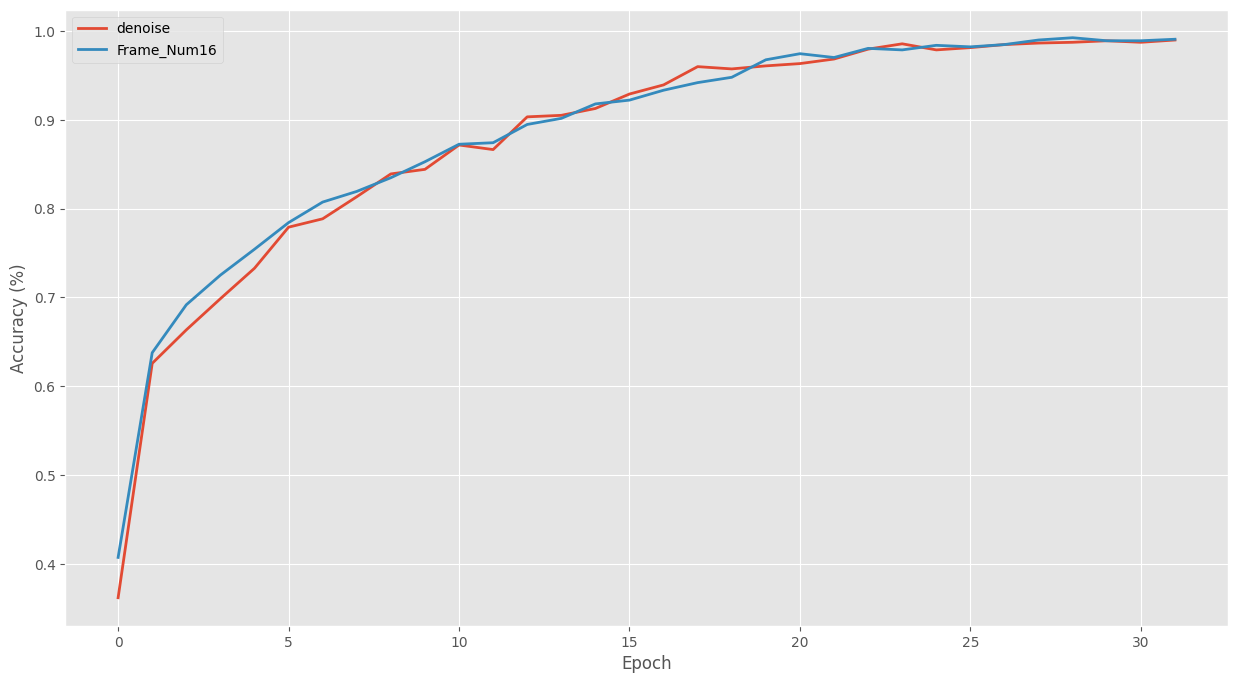

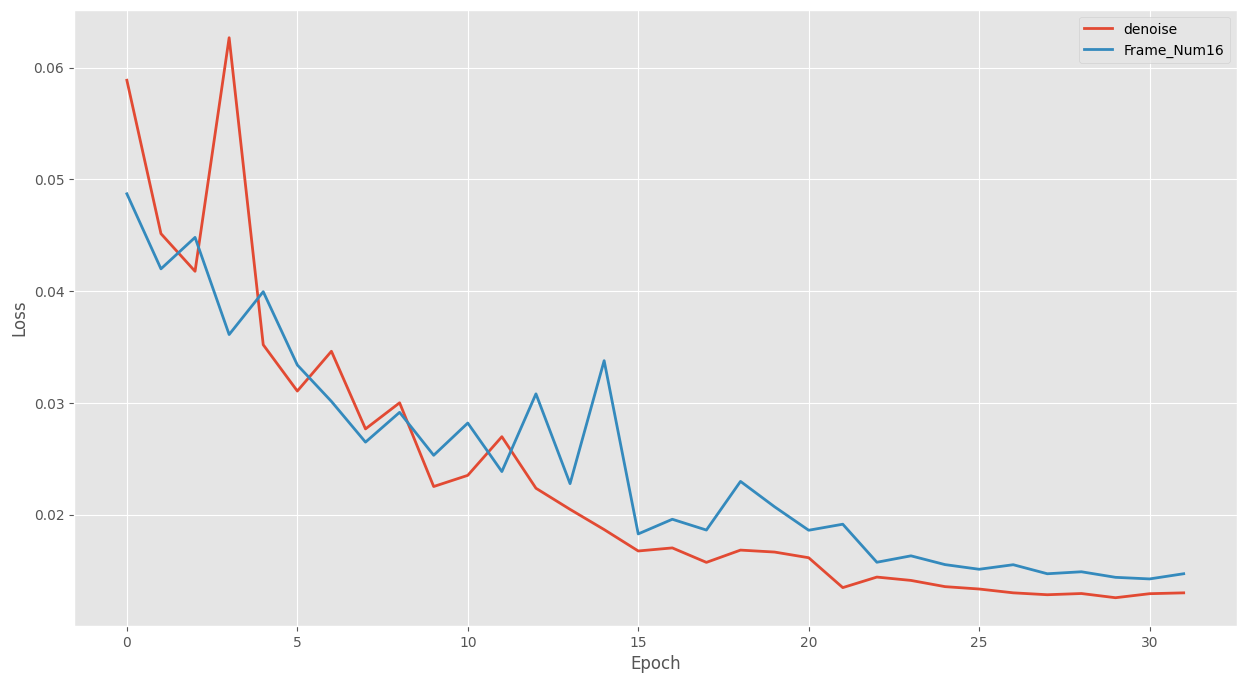

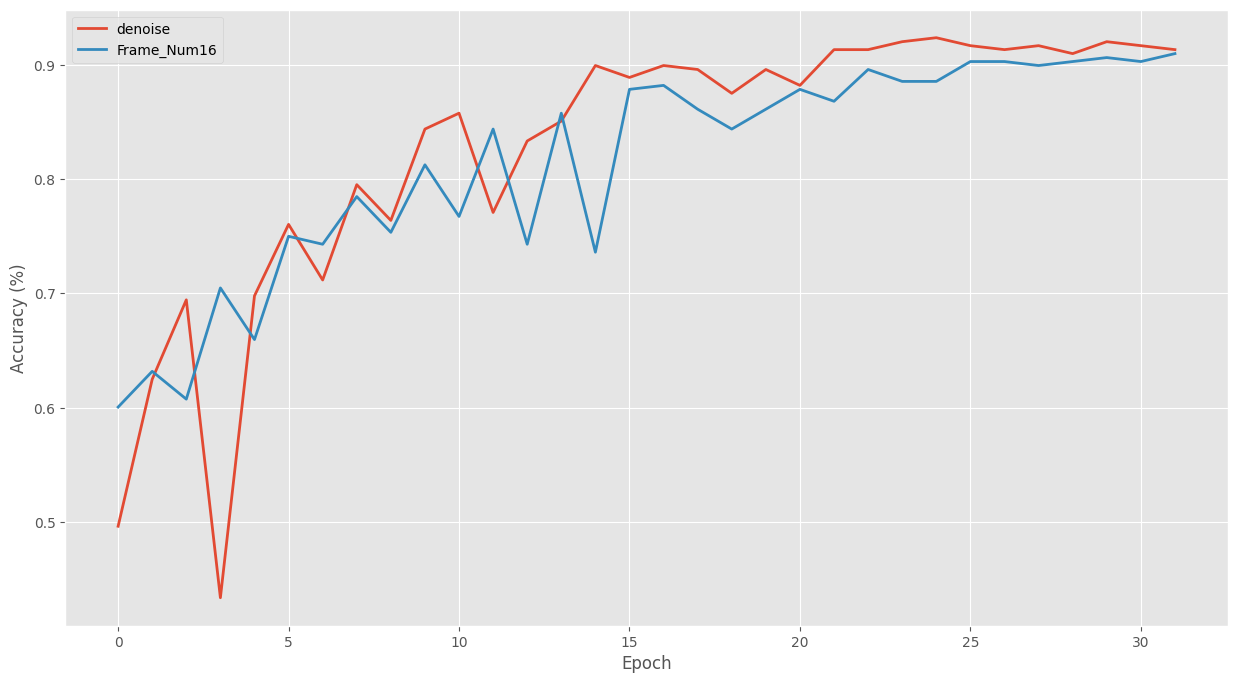

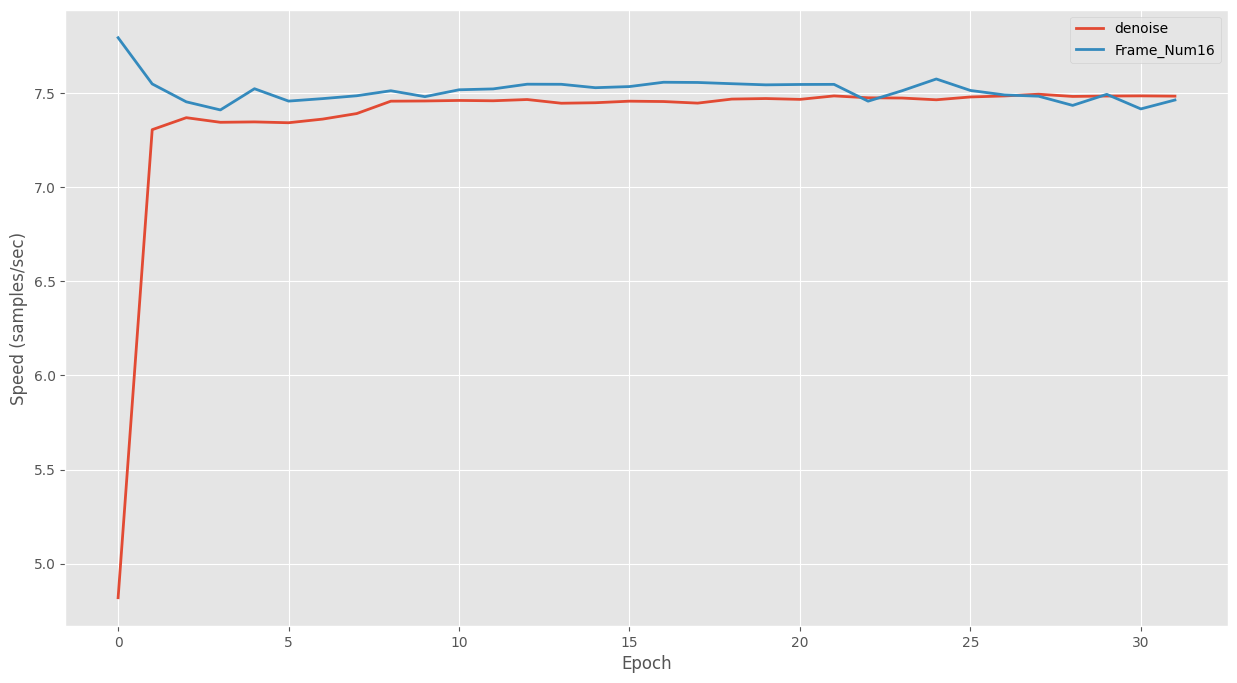

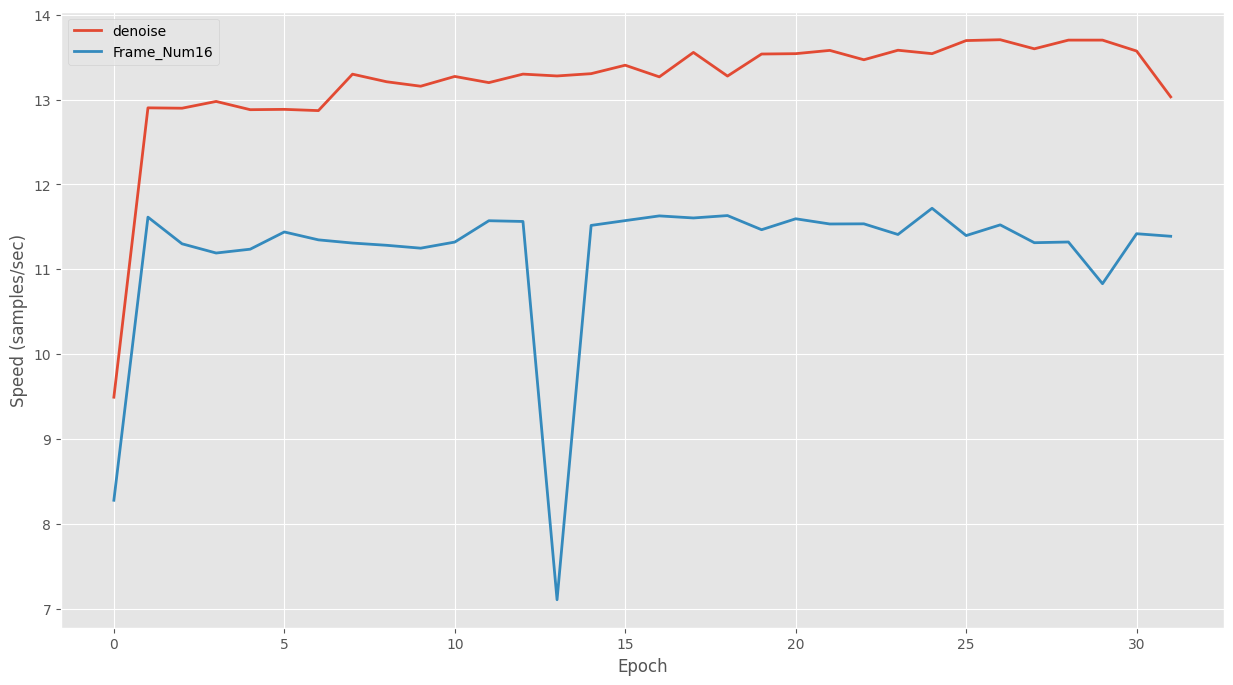

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置CSV文件路径和标签
# 定义CSV文件路径和标签
csv_files = {
    # 'Frame_Num2': r'd:\MIND\MIND\materials\lab\logs\T2_b16_adam_lr0.001_c128_amp_cupy.csv',
    # 'Frame_Num4': r'd:\MIND\MIND\materials\lab\logs\T4_b16_adam_lr0.001_c128_amp_cupy.csv',
    # 'Frame_Num8': r'd:\MIND\MIND\materials\lab\logs\T8_b16_adam_lr0.001_c128_amp_cupy.csv',
    'Frame_Num16': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_Base.csv',
    'denoise': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_denoise.csv',
    # 'denoise + SEBlock' : r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_SE.csv',
}


# 读取CSV文件
dfs = {}
for label, path in csv_files.items():
    df = pd.read_csv(path)
    dfs[label] = df

# 可视化配置
metrics = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']
y_labels = ['Loss', 'Accuracy (%)', 'Loss', 'Accuracy (%)', 'Speed (samples/sec)', 'Speed (samples/sec)']
titles = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']

# 创建图表
# plt.style.use('ggplot')
# fig, axes = plt.subplots(3, 2, figsize=(15, 18))
# axes = axes.flatten()

# 定义 CSV 文件的顺序
plot_order = ['denoise','Frame_Num16']

# 绘图
for i, (metric, y_label, title) in enumerate(zip(metrics, y_labels, titles)):
    plt.figure(figsize=(15, 8))
    for label in plot_order:
        df = dfs[label]
        epochs = df['Epoch']
        values = df[metric]
        plt.plot(epochs, values, label=label, linewidth=2)

    plt.xlabel('Epoch')
    plt.ylabel(y_label)
    # plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

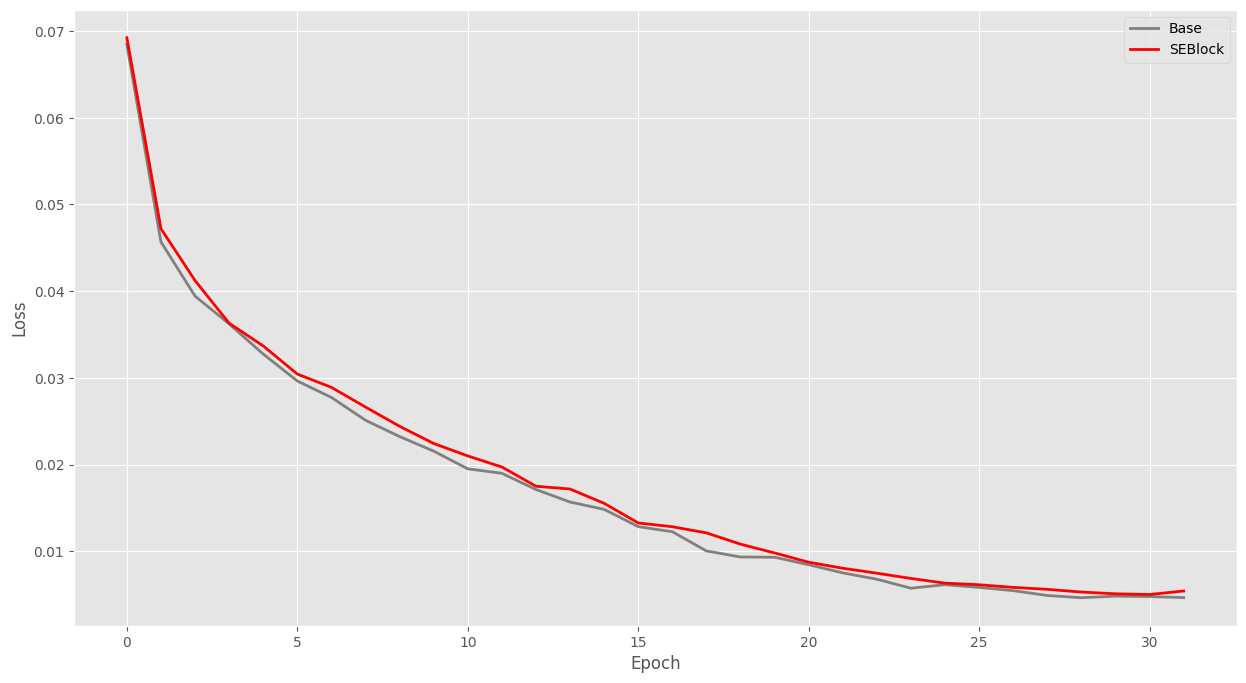

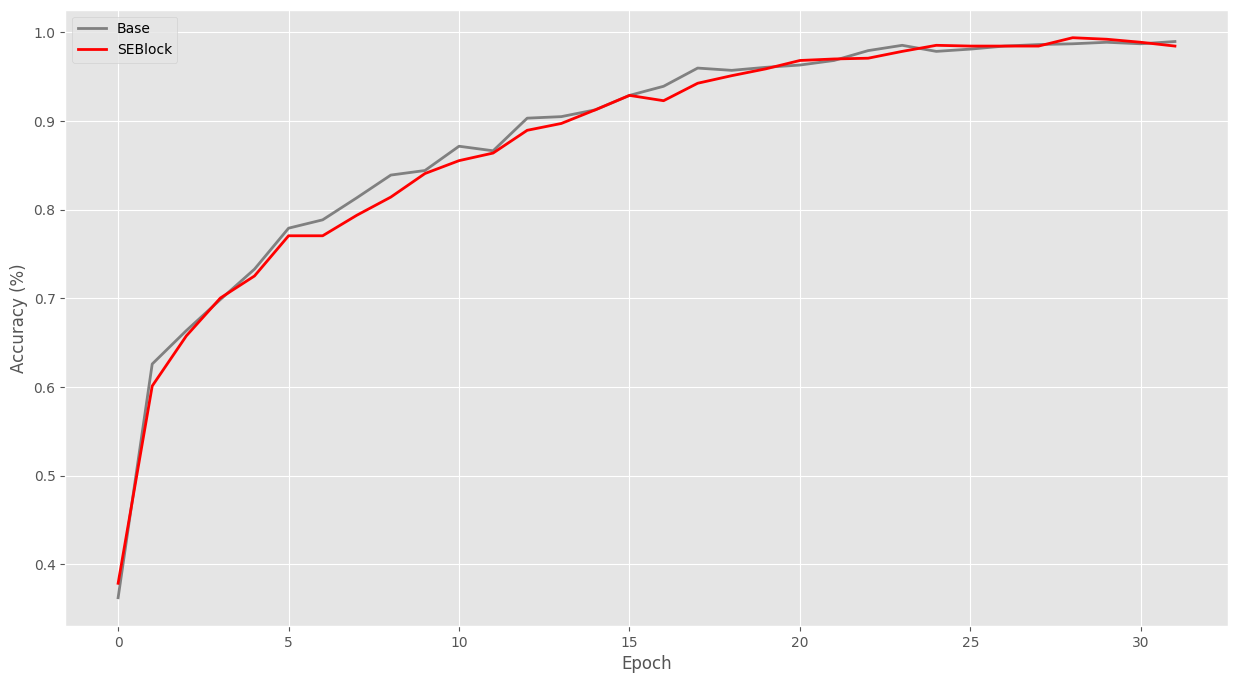

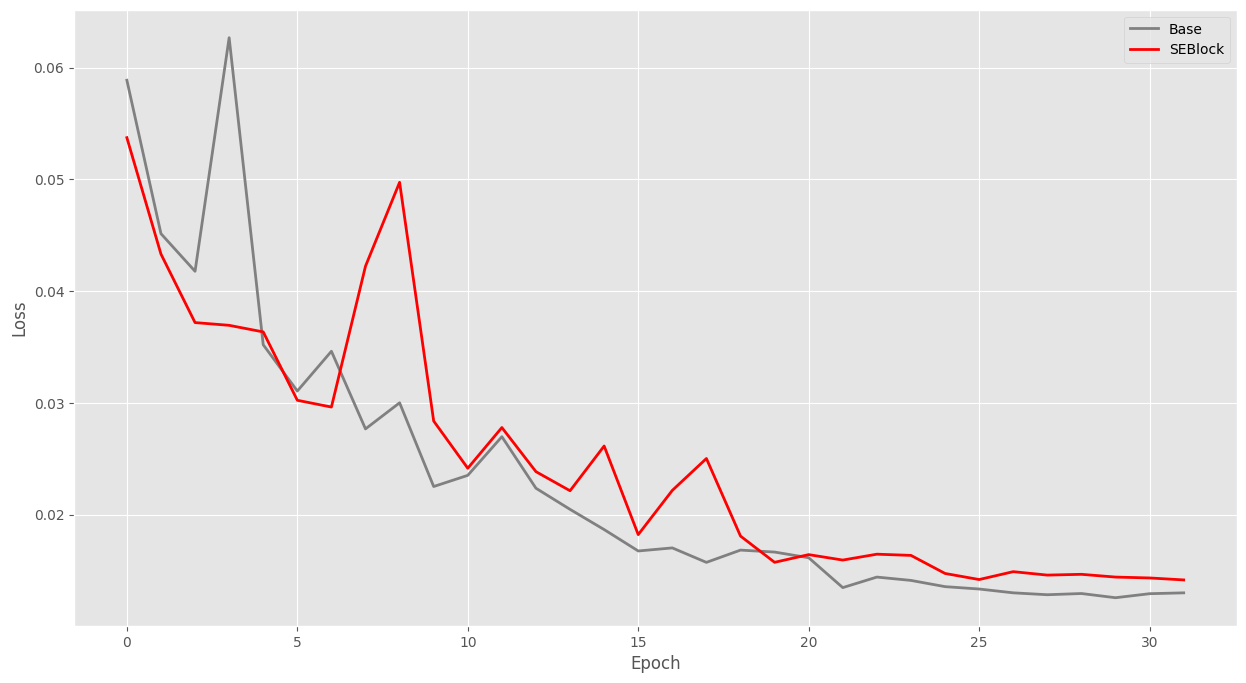

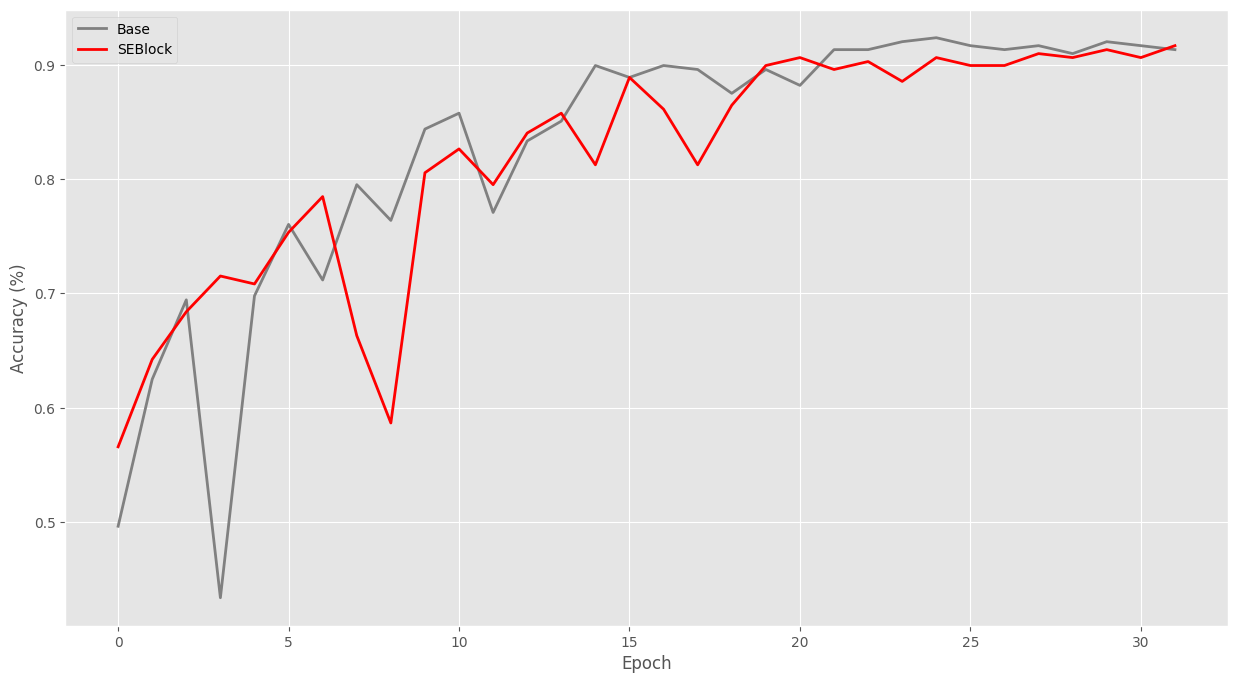

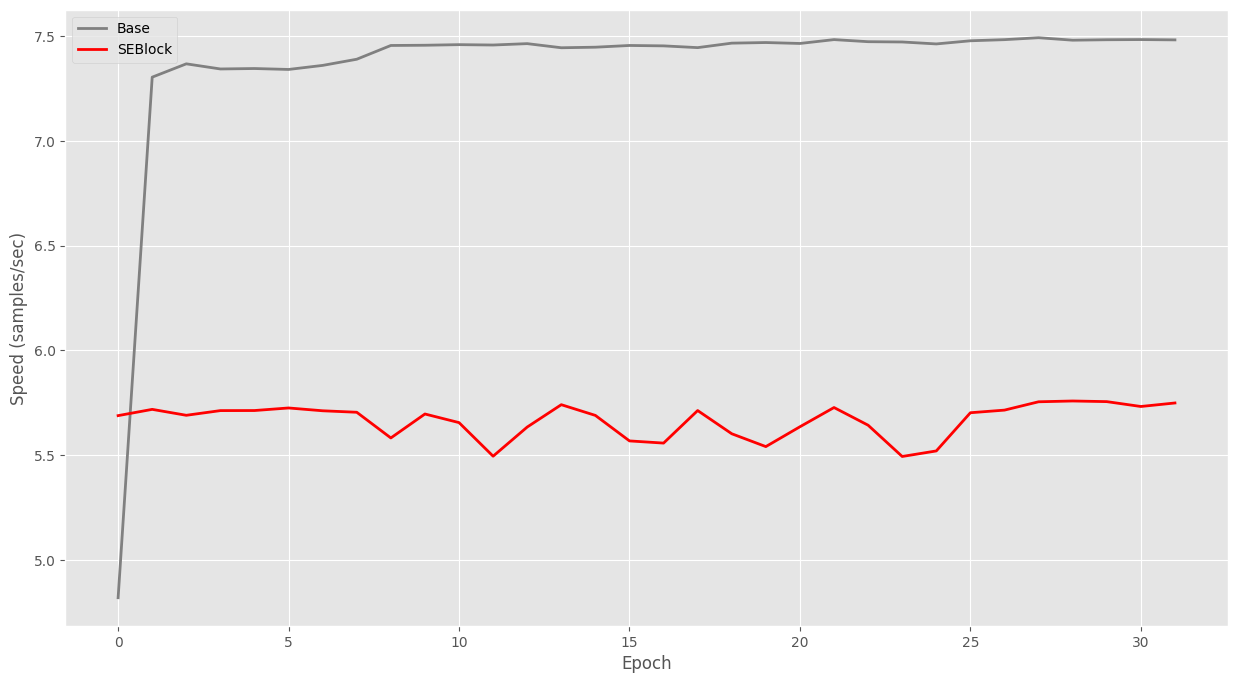

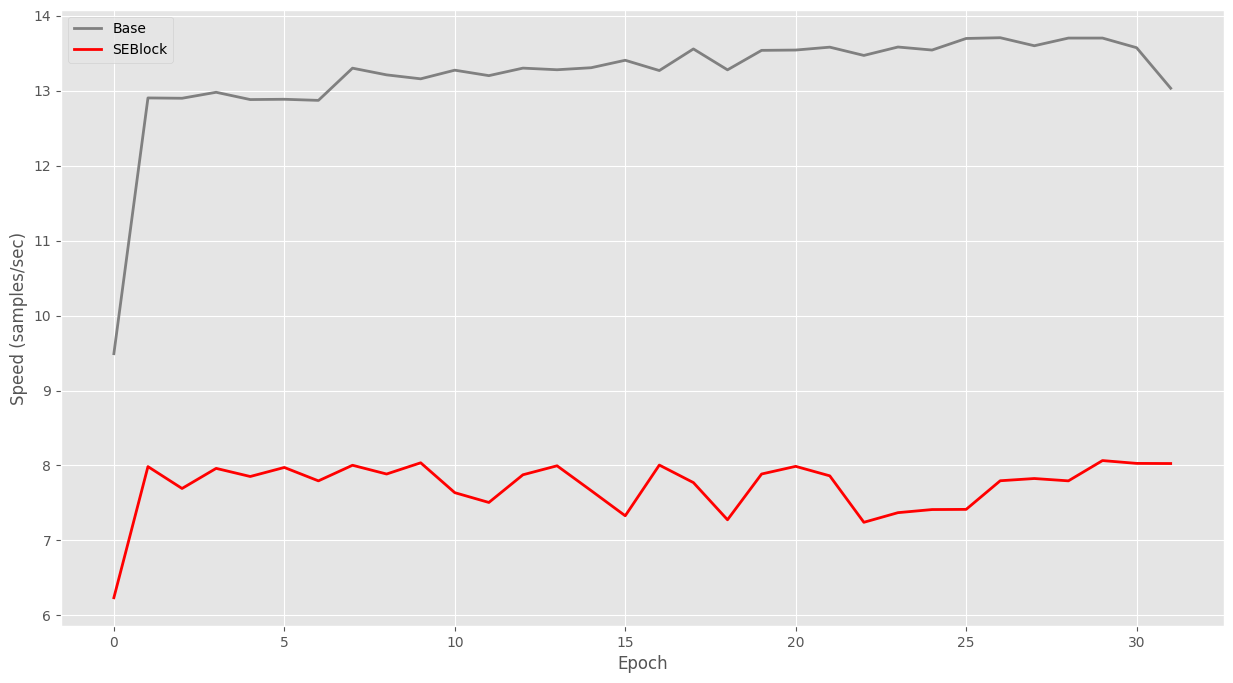

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置CSV文件路径和标签
# 定义CSV文件路径和标签
csv_files = {
    # 'Frame_Num2': r'd:\MIND\MIND\materials\lab\logs\T2_b16_adam_lr0.001_c128_amp_cupy.csv',
    # 'Frame_Num4': r'd:\MIND\MIND\materials\lab\logs\T4_b16_adam_lr0.001_c128_amp_cupy.csv',
    # 'Frame_Num8': r'd:\MIND\MIND\materials\lab\logs\T8_b16_adam_lr0.001_c128_amp_cupy.csv',
    # 'Frame_Num16': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_Base.csv',
    'Base': r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_denoise.csv',
    'SEBlock' : r'D:\MIND\MIND\materials\lab\logs\T16_b16_adam_lr0.001_c128_amp_cupy_SE.csv',
}


# 读取CSV文件
dfs = {}
for label, path in csv_files.items():
    df = pd.read_csv(path)
    dfs[label] = df

# 可视化配置
metrics = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']
y_labels = ['Loss', 'Accuracy (%)', 'Loss', 'Accuracy (%)', 'Speed (samples/sec)', 'Speed (samples/sec)']
titles = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy', 'Train Speed', 'Test Speed']

# 创建图表
# plt.style.use('ggplot')
# fig, axes = plt.subplots(3, 2, figsize=(15, 18))
# axes = axes.flatten()
# 自定义颜色
custom_colors = ['grey', 'red', 'orange']
for i, (metric, y_label, title) in enumerate(zip(metrics, y_labels, titles)):
    # ax = axes[i]
    plt.figure(figsize=(15, 8))
    for idx, (label, df) in enumerate(dfs.items()):
        epochs = df['Epoch']
        values = df[metric]
        # plt.plot(epochs, values, label=f'{label}', linewidth=2)
        # 使用自定义颜色
        plt.plot(epochs, values, label=f'{label}', linewidth=2, color=custom_colors[idx])
    
    # plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()